In [17]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score


basedir = '..'
feature_subdir = 'features'
data_subdir = 'data'
feat_name = 'new_feat_for_dnn.csv'

In [18]:
excludeBidders = [
    "74a35c4376559c911fdb5e9cfb78c5e4btqew",
    "7fab82fa5eaea6a44eb743bc4bf356b3tarle",
    "91c749114e26abdb9a4536169f9b4580huern",
    "bd0071b98d9479130e5c053a244fe6f1muj8h",
    "f35082c6d72f1f1be3dd23f949db1f577t6wd",
]

dfFeatures = pd.read_csv(os.path.join(basedir, feature_subdir, feat_name))
dfFeatures.drop('Unnamed: 0', axis=1, inplace=True)
for b in excludeBidders:
    dfFeatures = dfFeatures[dfFeatures.bidder_id != b]
    
dfLabels = pd.read_csv(os.path.join(basedir, data_subdir, "train.csv")).drop(
    ['address', 'payment_account'],
    axis=1,
)
common = dfFeatures.merge(dfLabels, on='bidder_id')

In [23]:
# print common.info()
robots = common[common['outcome'] == 1]
human = common[common['outcome'] == 0]
# print robots.shape, human.shape
# print np.min(np.log(robots.bids_cnt)), np.max(np.log(robots.bids_cnt))
# print np.min(np.log(human.bids_cnt)), np.max(np.log(human.bids_cnt))

eval_robots = None
for i in xrange(1, 12):
    sampled_robots = robots[np.logical_and(np.log(robots.bids_cnt) >= i, np.log(robots.bids_cnt) < i+1)]
    if sampled_robots.shape[0] > 0:
        sampled_robots = sampled_robots.sample(frac=0.24)
        if eval_robots is None:
            eval_robots = sampled_robots.copy()
        else:
            eval_robots = pd.concat([eval_robots, sampled_robots.copy()])
# print eval_robots.shape
# print eval_robots.bidder_id

eval_human = None
for i in xrange(0, 14):
    sampled_human = human[np.logical_and(np.log(human.bids_cnt) >= i, np.log(human.bids_cnt) < i+1)]
    if sampled_human.shape[0] > 0:
        sampled_human = sampled_human.sample(frac=0.24)
        if eval_human is None:
            eval_human = sampled_human.copy()
        else:
            eval_human = pd.concat([eval_human, sampled_human.copy()])
# print eval_human.shape
    
eval_data = pd.concat([eval_robots, eval_human])
train_data = common.drop(common.index[eval_data.index])
# print eval_data.shape
# print train_data.shape

In [24]:
if feat_name == 'new_feat_for_dnn.csv':
    X_train = np.array(train_data.drop(['bidder_id', 'outcome', 'nan', 'vc'], axis=1))
    X_eval = np.array(eval_data.drop(['bidder_id', 'outcome', 'nan', 'vc'], axis=1))
else:
    X_train = np.array(train_data.drop(['bidder_id', 'outcome'], axis=1))
    X_eval = np.array(eval_data.drop(['bidder_id', 'outcome'], axis=1))

y_train = np.ravel(train_data[['outcome']])
y_eval = np.ravel(eval_data[['outcome']])

In [25]:
# print(X_train.shape)
# print(X_eval.shape)
mean = np.mean(np.vstack((X_train, X_eval)), axis=0)
std = np.std(np.vstack((X_train, X_eval)), axis=0)

X_train = (X_train - mean) / (std + 0.001)
X_eval = (X_eval - mean) / (std + 0.001)

LR = 0.010000
epoch: 0, lr:0.010000
train loss: 1.394595, 	accuracy: 0.448000, 	AUC: 0.467743
 eval loss: 1.289587, 	accuracy: 0.553911, 	AUC: 0.612271

epoch: 1, lr:0.010000
train loss: 1.194669, 	accuracy: 0.656000, 	AUC: 0.722068
 eval loss: 1.206040, 	accuracy: 0.769556, 	AUC: 0.663671

epoch: 2, lr:0.010000
train loss: 1.074215, 	accuracy: 0.788667, 	AUC: 0.843443
 eval loss: 1.191073, 	accuracy: 0.852008, 	AUC: 0.684058

epoch: 3, lr:0.010000
train loss: 0.985280, 	accuracy: 0.860000, 	AUC: 0.894550
 eval loss: 1.154133, 	accuracy: 0.841438, 	AUC: 0.706860

epoch: 4, lr:0.010000
train loss: 0.912444, 	accuracy: 0.864000, 	AUC: 0.921085
 eval loss: 1.141619, 	accuracy: 0.866808, 	AUC: 0.719903

epoch: 5, lr:0.010000
train loss: 0.836274, 	accuracy: 0.889333, 	AUC: 0.937825
 eval loss: 1.136698, 	accuracy: 0.871036, 	AUC: 0.729275

epoch: 6, lr:0.010000
train loss: 0.788902, 	accuracy: 0.896667, 	AUC: 0.941736
 eval loss: 1.154813, 	accuracy: 0.864693, 	AUC: 0.731208

epoch: 7, lr:

 eval loss: 1.219359, 	accuracy: 0.860465, 	AUC: 0.704734

epoch: 29, lr:0.001000
train loss: 0.971977, 	accuracy: 0.883333, 	AUC: 0.924145
 eval loss: 1.216633, 	accuracy: 0.860465, 	AUC: 0.705797

Model saved in file: dnn_log/model.ckpt
best auc at epoch: 29, accuracy: 0.860465, AUC: 0.705797
LR = 0.000100
epoch: 0, lr:0.000100
train loss: 1.419178, 	accuracy: 0.086000, 	AUC: 0.657469
 eval loss: 1.328163, 	accuracy: 0.071882, 	AUC: 0.694783

epoch: 1, lr:0.000100
train loss: 1.411353, 	accuracy: 0.088000, 	AUC: 0.658891
 eval loss: 1.323425, 	accuracy: 0.078224, 	AUC: 0.694589

epoch: 2, lr:0.000100
train loss: 1.403498, 	accuracy: 0.090667, 	AUC: 0.658320
 eval loss: 1.318862, 	accuracy: 0.084567, 	AUC: 0.693913

epoch: 3, lr:0.000100
train loss: 1.378632, 	accuracy: 0.094000, 	AUC: 0.668324
 eval loss: 1.314558, 	accuracy: 0.084567, 	AUC: 0.694686

epoch: 4, lr:0.000100
train loss: 1.389918, 	accuracy: 0.100667, 	AUC: 0.660435
 eval loss: 1.310313, 	accuracy: 0.086681, 	AUC: 0.694

epoch: 26, lr:0.000010
train loss: 1.338272, 	accuracy: 0.310667, 	AUC: 0.579078
 eval loss: 1.283904, 	accuracy: 0.321353, 	AUC: 0.580483

epoch: 27, lr:0.000010
train loss: 1.338015, 	accuracy: 0.311333, 	AUC: 0.578919
 eval loss: 1.283686, 	accuracy: 0.321353, 	AUC: 0.580773

epoch: 28, lr:0.000010
train loss: 1.337006, 	accuracy: 0.311333, 	AUC: 0.580154
 eval loss: 1.283469, 	accuracy: 0.321353, 	AUC: 0.580870

epoch: 29, lr:0.000010
train loss: 1.336571, 	accuracy: 0.313333, 	AUC: 0.580538
 eval loss: 1.283252, 	accuracy: 0.321353, 	AUC: 0.581063

Model saved in file: dnn_log/model.ckpt
best auc at epoch: 29, accuracy: 0.321353, AUC: 0.581063
Best LR: 0.010000 epoch: 11 loss:1.513057 accuracy: 0.828753 AUC: 0.798889


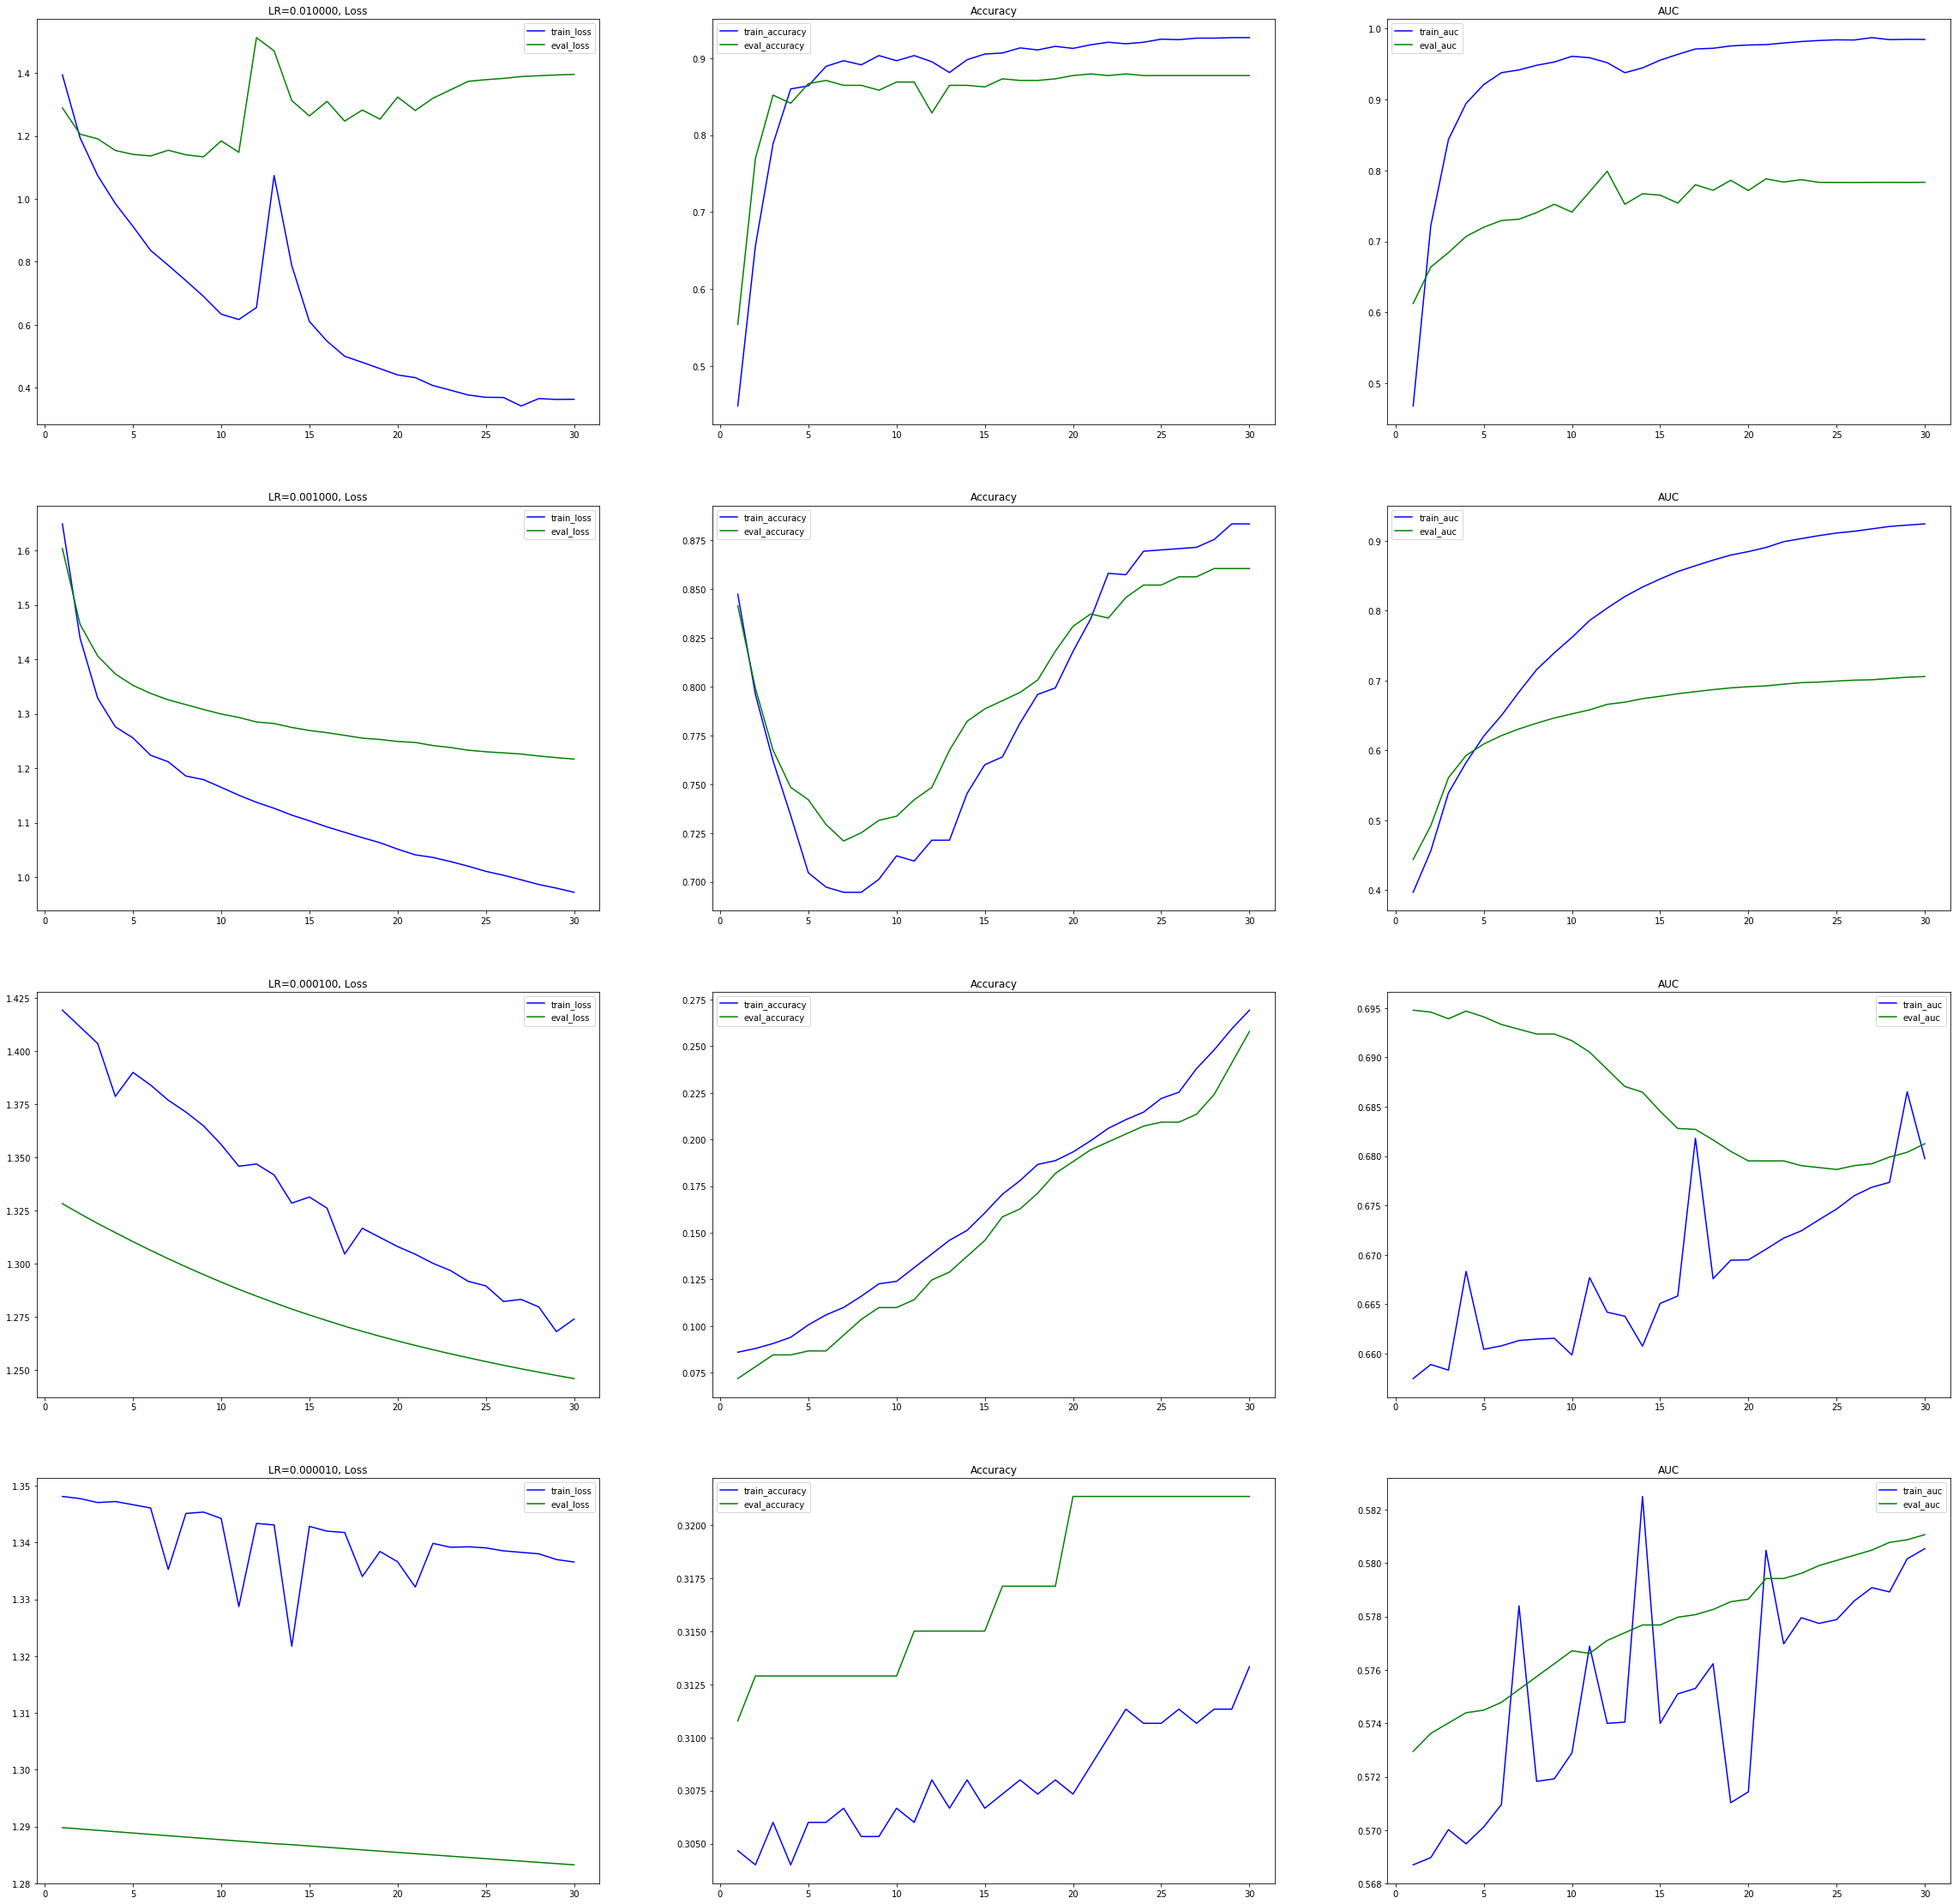

INFO:tensorflow:Restoring parameters from dnn_log/model_best.ckpt
<type 'numpy.ndarray'>
(4700, 2)
[ 0.0407851   0.00741101  0.21167789  0.21141522  0.17792669  0.29292721
  0.13758323  0.23181987  0.23920423  0.17321202  0.97545445  0.1964983
  0.40867728  0.25959074  0.15372972  0.09099499  0.06182082  0.28786153
  0.2799322   0.20109493]


In [27]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
from os.path import join
from sklearn.metrics import roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
from new_commons import *


name = "DNN"
FEATURE_DIM = 668
BATCH_SIZE = 100
LOG_DIR = 'dnn_log'

lrs = [0.01, 0.001, 0.0001, 0.00001]
BASE_LEARNING_RATE = None
#DECAY_STEP = 100000 # 14 step per epoch
DECAY_RATE = 0.33
MAX_EPOCH = 30

save = True
restore = False
do_train = True
do_test = True

global_best_auc = None


def _variable_with_weight_decay(name, shape, stddev, wd, use_xavier=True):
    if use_xavier:
        initializer = tf.contrib.layers.xavier_initializer()
    else:
        initializer = tf.truncated_normal_initializer(stddev=stddev)
    var = tf.get_variable(name, shape, initializer=initializer, dtype=tf.float32)
    if wd is not None:
        weight_decay = tf.multiply(tf.nn.l2_loss(var), wd, name='weight_loss')
        tf.add_to_collection('losses', weight_decay)
    return var

def fully_connected(inputs,
                    num_outputs,
                    scope,
                    use_xavier=True,
                    stddev=1e-3,
                    weight_decay=1e-4,
                    activation_fn=tf.nn.relu,
                    bn=False,
                    bn_decay=0.0,
                    is_training=None):
    with tf.variable_scope(scope) as sc:
        num_input_units = inputs.get_shape()[-1].value
        weights = _variable_with_weight_decay('weights',
                                                shape=[num_input_units, num_outputs],
                                                use_xavier=use_xavier,
                                                stddev=stddev,
                                                wd=weight_decay)
        outputs = tf.matmul(inputs, weights)
        biases = tf.get_variable('biases', [num_outputs], initializer=tf.constant_initializer(0.0), dtype=tf.float32)
        outputs = tf.nn.bias_add(outputs, biases)
        if bn:
            outputs = tf.contrib.layers.batch_norm(
                                outputs, decay=bn_decay, center=True, scale=True, is_training=is_training, fused=True, scope='bn')

        if activation_fn is not None:
            outputs = activation_fn(outputs)
        return outputs


def dropout(inputs,
            is_training,
            scope,
            keep_prob=0.5,
            noise_shape=None):
    with tf.variable_scope(scope) as sc:
        outputs = tf.cond(is_training,
                        lambda: tf.nn.dropout(inputs, keep_prob, noise_shape),
                        lambda: inputs)
        return outputs


def dnn_model(features, is_training):
    net = fully_connected(features, 128, scope='fc1', is_training=is_training)
#     net = dropout(net, is_training, scope='dp1', keep_prob = 0.5)
    net = fully_connected(net, 128, scope='fc2', is_training=is_training)
#    net = dropout(net, is_training, scope='dp2', keep_prob = 0.5)    
#    net = fully_connected(net, 10, scope='fc3', is_training=is_training)
#    net = dropout(net, is_training, scope='dp3', keep_prob = 0.3)        
    net = fully_connected(net, 2, scope='fc_final', is_training=is_training, activation_fn=None)
    return net

def get_loss(pred, label):
    loss = tf.nn.weighted_cross_entropy_with_logits(targets=label,
    logits=pred[:, 1] - pred[:, 0],
    pos_weight=19)
#    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=pred, labels=label)
    classify_loss = tf.reduce_mean(loss)
    return classify_loss

#def moving_average(a, n=3) :
#    ret = np.cumsum(a, dtype=float)
#    ret[n:] = ret[n:] - ret[:-n]
#    return ret[n - 1:] / n

def get_learning_rate(losses, lr, tol = 1e-2):
    if len(losses) < 3:
        return lr
    if losses[-1] - losses[-2] > tol and losses[-2] - losses[-3]  > tol:
        lr = lr * DECAY_RATE
    return max(lr, 0.00001)
#    averaged_loss = moving_average(np.array(losses))
#    if averaged_loss[-1] - averaged_loss[-2] > 0.1:
#        lr = lr * 0.33
#    learning_rate = tf.train.exponential_decay(
#                        BASE_LEARNING_RATE,  # Base learning rate.
#                        step * BATCH_SIZE,  # Current index into the dataset.
#                        DECAY_STEP,          # Decay step.
#                        DECAY_RATE,          # Decay rate.
#                        staircase=True)
#    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
#    return learning_rate        
#    return BASE_LEARNING_RATE

    
def train(MAX_EPOCH, train_data, train_labels, eval_data, eval_labels, idx):
    with tf.Graph().as_default():
        features_pl = tf.placeholder(tf.float32, shape=(None, FEATURE_DIM))
        labels_pl = tf.placeholder(tf.float32, shape=(None))
        is_training_pl = tf.placeholder(tf.bool, shape=())
        
        learning_rate = tf.placeholder(tf.float32, shape=())
        
        pred = dnn_model(features_pl, is_training_pl)
        loss = get_loss(pred, labels_pl)
        
        step = tf.Variable(0)
#        learning_rate = get_learning_rate(step)
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=step)
        
        saver = tf.train.Saver()
        
        sess = tf.Session()
        init = tf.global_variables_initializer()
        sess.run(init, {is_training_pl: True})
        if restore:
            saver.restore(sess, join(LOG_DIR, 'model_best.ckpt'))
        
        best_eval_auc = None
        best_eval_accuracy = None
        best_eval_epoch = None
        best_eval_loss = None
        
        losses = []
        learning_rate_val = BASE_LEARNING_RATE
        stats = defaultdict(list)
        
        for epoch in range(MAX_EPOCH):            
            # train
            p = np.random.permutation(train_data.shape[0])
            train_data = train_data[p,:]
            train_labels = train_labels[p]
            
            start_idx = 0
            total_correct = 0
            total_seen = 0
            loss_sum = 0
            num_batches = train_data.shape[0]//BATCH_SIZE
            
            probability = np.zeros(num_batches * BATCH_SIZE)
            
            learning_rate_val = get_learning_rate(losses, learning_rate_val)
            
            while(True):                
                end_idx = start_idx + BATCH_SIZE
                batch_data = train_data[start_idx:end_idx, :]
                batch_labels = train_labels[start_idx:end_idx]

                _, _, pred_val, loss_val = sess.run([step, train_op, pred, loss], feed_dict={features_pl:batch_data, labels_pl:batch_labels, is_training_pl:True, learning_rate:learning_rate_val})
                new_pred_val = np.argmax(pred_val, 1)
                correct = np.sum(new_pred_val == batch_labels)
                total_correct += correct
                total_seen += BATCH_SIZE
                loss_sum += loss_val
                
                normed_pred_val = pred_val - np.max(pred_val, axis=1)[:, None]
                probability[start_idx:end_idx] = np.exp(normed_pred_val[:, 1]) / np.sum(np.exp(normed_pred_val),axis=1)
                
                start_idx += BATCH_SIZE
                if start_idx + BATCH_SIZE > train_data.shape[0]:
                    break
            
            train_loss = loss_sum / float(num_batches)
            train_auc = roc_auc_score(train_labels[:num_batches * BATCH_SIZE], probability)
            print('epoch: %d, lr:%f\ntrain loss: %f, \taccuracy: %f, \tAUC: %f' % (epoch, learning_rate_val, train_loss, total_correct / float(total_seen), train_auc))
            stats['lr'].append(learning_rate_val)
            stats['train_loss'].append(train_loss)
            stats['train_accuracy'].append(total_correct / float(total_seen))
            stats['train_auc'].append(train_auc)
            
            # eval
            _, pred_val, loss_val = sess.run([step, pred, loss], feed_dict={features_pl:eval_data, labels_pl:eval_labels, is_training_pl:False})
            losses.append(loss_val)
            
            new_pred_val = np.argmax(pred_val, 1)
            eval_accuracy = np.mean(new_pred_val == eval_labels)
            
            normed_pred_val = pred_val - np.max(pred_val, axis=1)[:, None]
            probability = np.exp(normed_pred_val[:, 1]) / np.sum(np.exp(normed_pred_val),axis=1)
            eval_auc = roc_auc_score(eval_labels, probability)

            if best_eval_auc is None or eval_auc > best_eval_auc:
                best_eval_auc = eval_auc
                best_eval_accuracy = eval_accuracy
                best_eval_epoch = epoch
                best_eval_loss = loss_val
            if save:
                global global_best_auc
                if global_best_auc is None or eval_auc > global_best_auc:
                    save_path = saver.save(sess, os.path.join(LOG_DIR, "model_best.ckpt"))
                    global_best_auc = eval_auc
            print(' eval loss: %f, \taccuracy: %f, \tAUC: %f\n' % (loss_val, eval_accuracy, eval_auc))
            stats['eval_loss'].append(loss_val)
            stats['eval_accuracy'].append(eval_accuracy)
            stats['eval_auc'].append(eval_auc)
                        
            
#             Save the variables to disk.
#            if epoch % 50 == 0:
#                save_path = saver.save(sess, os.path.join(LOG_DIR, "model.ckpt"))
#                print("Model saved in file: %s" % save_path)
        save_path = saver.save(sess, os.path.join(LOG_DIR, "model.ckpt"))
        print("Model saved in file: %s" % save_path)
        print('best auc at epoch: %d, accuracy: %f, AUC: %f' % (best_eval_epoch, best_eval_accuracy, best_eval_auc))
        
        #plot
        plt.subplot(len(lrs), 3, idx*3+1)
        plt.plot(xrange(1, MAX_EPOCH+1), stats['train_loss'], 'b-', label='train_loss')
        plt.plot(xrange(1, MAX_EPOCH+1), stats['eval_loss'], 'g-', label='eval_loss')
        plt.legend()
        plt.title('LR=%f, Loss'%lrs[idx])
        plt.subplot(len(lrs), 3, idx*3+2)
        plt.plot(xrange(1, MAX_EPOCH+1), stats['train_accuracy'], 'b-', label='train_accuracy')
        plt.plot(xrange(1, MAX_EPOCH+1), stats['eval_accuracy'], 'g-', label='eval_accuracy')
        plt.legend()
        plt.title('Accuracy')
        plt.subplot(len(lrs), 3, idx*3+3)
        plt.plot(xrange(1, MAX_EPOCH+1), stats['train_auc'], 'b-', label='train_auc')
        plt.plot(xrange(1, MAX_EPOCH+1), stats['eval_auc'], 'g-', label='eval_auc')
        plt.legend()
        plt.title('AUC')
        
        return best_eval_epoch, best_eval_loss, best_eval_accuracy, best_eval_auc
        

def predict(test_data):
    with tf.Graph().as_default():
        features_pl = tf.placeholder(tf.float32, shape=(None, FEATURE_DIM))
        is_training_pl = tf.placeholder(tf.bool, shape=())
        
        best_model = dnn_model(features_pl, is_training_pl)
        
        saver = tf.train.Saver()
        
        sess = tf.Session()
        saver.restore(sess, os.path.join(LOG_DIR, "model_best.ckpt"))
        pred_val = sess.run(best_model, feed_dict={features_pl:test_data, is_training_pl:False})
        return pred_val

def main(unused_argv):
##    print(human.shape) # 1881 1881/5 = 376
##    print(robot.shape) # 98, 98/5 = 19    
    if do_train:
        
        best_lr = None
        best_epoch = None
        best_accuracy = None
        best_loss = None
        best_AUC = None
        
        plt.figure(figsize=(40, 10*len(lrs)))
        for idx, lr in enumerate(lrs):
            print('LR = %f' % lr)
            global BASE_LEARNING_RATE
            BASE_LEARNING_RATE = lr
            epoch, loss, accuracy, AUC = train(MAX_EPOCH, X_train, y_train, X_eval, y_eval, idx)
            if best_AUC is None or best_AUC < AUC:
                best_epoch = epoch
                best_accuracy = accuracy
                best_AUC = AUC
                best_lr = lr
                best_loss = loss
        print('Best LR: %f epoch: %d loss:%f accuracy: %f AUC: %f' % (best_lr, best_epoch, best_loss, best_accuracy, best_AUC))
        plt.savefig(join(LOG_DIR, 'plt.eps'))
        plt.show()
        
        
    if do_test:    
        common, X_test = prepareTestFeatures()
        X_test = (X_test - mean) / (std + 0.001)
        
        prediction = predict(X_test)
        print(type(prediction))
        print(prediction.shape)
        prediction = prediction - np.max(prediction, axis=1)[:, None]
        probability = np.exp(prediction[:, 1]) / np.sum(np.exp(prediction),axis=1)
        print(probability[:20])

        predictionDf = pd.DataFrame(data={"prediction": probability})
        pd.concat([common['bidder_id'], predictionDf], axis=1).to_csv(
            "../submissions/{}.csv".format(name),
            index=False,
        )

main(None)


In [25]:
del prepareTestFeatures